In [26]:
import warnings
warnings.filterwarnings('ignore') # uncomment this line to suppress warnings

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn.model_selection import  ParameterGrid
from sklearn.model_selection import  GridSearchCV
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

## The data are split in two files, load the files and merge them according to the first column, which is the index; both the files contain a "class" column, keep both the columns in the merged file calling them "class_x" and "class_y" (you can use the merge function of pandas dataframes)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
url1 = '/content/drive/MyDrive/ML/Data/exam_1.csv'
url2 = '/content/drive/MyDrive/ML/Data/exam_2.csv'
sep = ','
df1 = pd.read_csv(url1, sep = sep)
df2 = pd.read_csv(url2, sep = sep)

In [8]:
df = df1.merge(df2, how = 'outer', left_index = True, right_index = True, suffixes = ('_x', '_y'))

## 2. Delete all the rows where class_x is different from class_y, then drop class_y and rename class_x as class 

In [9]:
# Find all the indexes of the rows where class_x is different from class_y
indexes_to_delete = df[df['class_x'] != df['class_y']].index

# Drop those rows from the dataframe
df = df.drop(index = indexes_to_delete, axis = 0)

# Drop class_y
df = df.drop(labels = 'class_y', axis = 1)

# Rename class_x as class
df = df.rename(columns = {'class_x': 'class'})

## 3. Reorder the columns in alphabetical order, but placing the class column as the last one; the cleaned dataframe must be named df; show its size and head

In [10]:
class_column = 'class'

# Get the column names
column_names = list(df.columns)

# Remove the class column
column_names.remove(class_column)

# Sort the values
column_names.sort()

# Append class because we want it last
column_names.append(class_column)

# Reindex the dataframe
df = df.reindex(columns = column_names)

## 4 Find the best classification scheme using three classification methods

In [30]:
def print_results(model):
    print("Best parameters set found on train set:")
    print()
    # if best is linear there is no gamma parameter
    print(model.best_params_)
    print()
    print("The model is trained on the full train set.")
    print("The scores are computed on the full test set.")
    print()
    y_true, y_pred = ytest, model.predict(Xtest)
    accuracy = accuracy_score(y_true, y_pred)
    print("Accuracy of the model = ", round(accuracy,2))
    print("Confusion matrix:\n")

    title = "Confusion matrix"

    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        Xtest,
        y_true,
        cmap = plt.cm.Blues,
    )
    
    disp.ax_.set_title(title)

    plt.show()
    print()
    print()
    return accuracy

### First split dataset in train and test

In [11]:
target = "class"
X = df.drop(target, axis = 1)
y = df[target]

In [12]:
ts = 0.3
random_state = 42
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,test_size = ts, random_state = random_state)

### Model 1

Best parameters set found on train set:

{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 8}

The model is trained on the full train set.
The scores are computed on the full test set.

Accuracy of the model =  0.84
Confusion matrix:



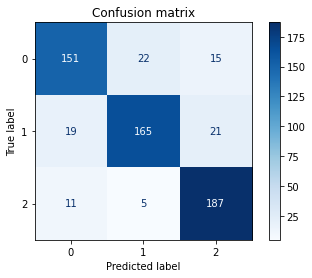

In [31]:
model_param = {'criterion':['gini', 'entropy'], 'max_depth':list(range(1,10)), 'min_samples_split': range(2,10)}
score = "accuracy"
model_est = DecisionTreeClassifier(random_state=random_state)
model1 = GridSearchCV(estimator = model_est ,param_grid = model_param, scoring = score)
model1.fit(Xtrain, ytrain)
acc_dec = print_results(model1)

### Model 2

Best parameters set found on train set:

{'learning_rate': 0.75, 'n_estimators': 30}

The model is trained on the full train set.
The scores are computed on the full test set.

Accuracy of the model =  0.8
Confusion matrix:



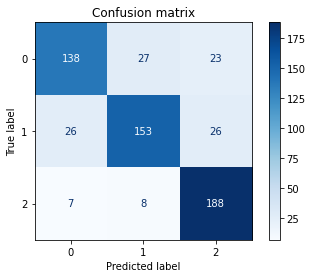

In [32]:
model_param = list(ParameterGrid({
    'n_estimators':[[20],[30],[40],[50]],
    'learning_rate':[[0.5],[0.75],[1],[1.25],[1.5]]}
))



model_est = AdaBoostClassifier(random_state=random_state)

model2 = GridSearchCV(model_est, model_param, scoring=score)

model2.fit(Xtrain, ytrain)

acc_ada = print_results(model2)

### Model3

Best parameters set found on train set:

{'var_smoothing': 1e-06}

The model is trained on the full train set.
The scores are computed on the full test set.

Accuracy of the model =  0.85
Confusion matrix:



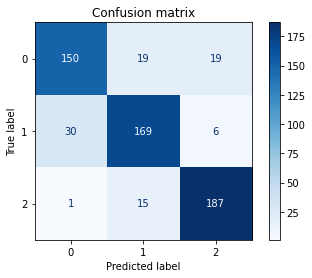

In [33]:
model_param = [{'var_smoothing': [10, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-07, 1e-8, 1e-9, 1e-10]}]  
model_est = GaussianNB()

model3 = GridSearchCV(model_est, model_param, scoring=score)

model3.fit(Xtrain, ytrain)

acc_naive = print_results(model3)

## Produce a plot of the accuracies given by the methods attempted

<BarContainer object of 3 artists>

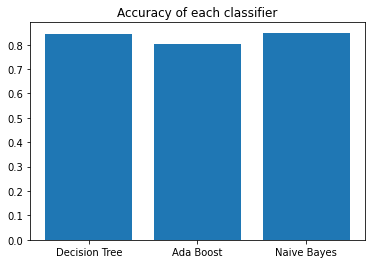

In [34]:
classifier_list = ['Decision Tree', 'Ada Boost', 'Naive Bayes']
acc_list = [acc_dec, acc_ada, acc_naive]
plt.title('Accuracy of each classifier')
plt.bar(classifier_list, acc_list)